In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Housing.csv")
df.shape

(545, 13)

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
def map_yes_or_no(df,columns):
    for col in columns:
        df[col]=df[col].map({'yes':1,'no':0})
    return df
columns_to_map = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']


df = map_yes_or_no(df, columns_to_map)

In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [7]:
NOC = df["furnishingstatus"].unique()
print("Number of Category in within This Feature")

print(len(NOC))
df = pd.get_dummies(df,columns=["furnishingstatus"])

Number of Category in within This Feature
3


In [8]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False


In [9]:
df.rename(columns=lambda x: x.replace('furnishingstatus_', ''), inplace=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False


In [10]:
df[['furnished', 'semi-furnished', 'unfurnished']] = df[['furnished', 'semi-furnished', 'unfurnished']].astype(int)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


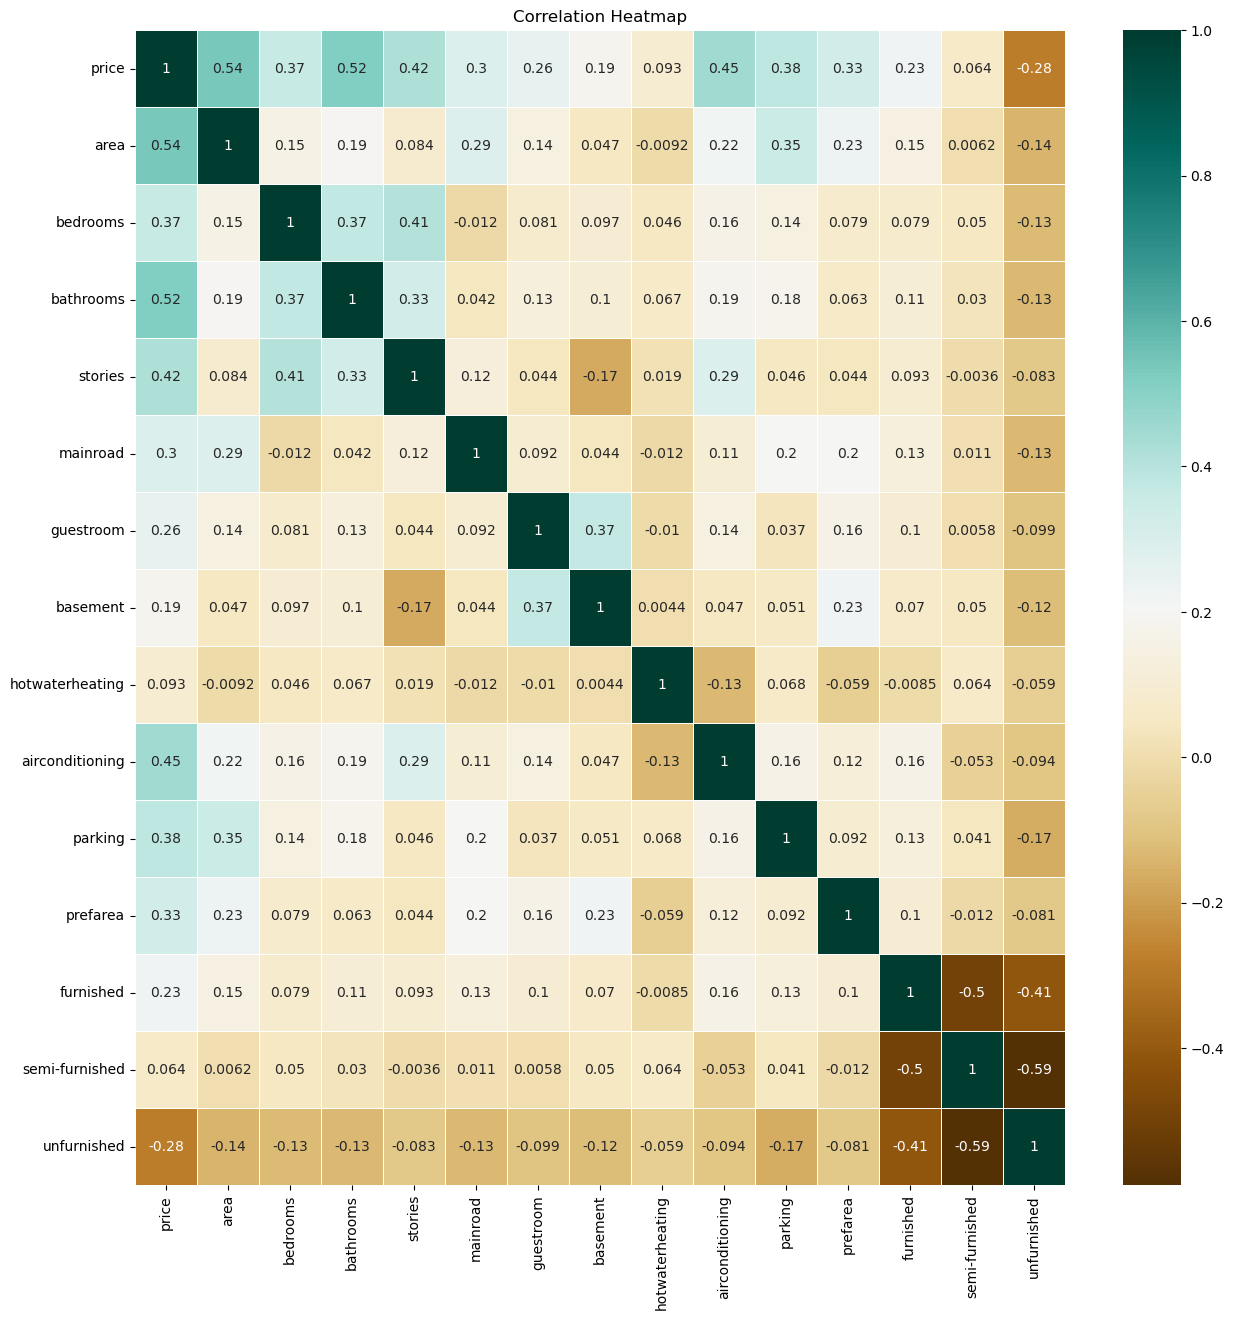

In [11]:
correlation_matrix = df.corr()


plt.figure(figsize=(15, 15))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True,cmap='BrBG',linewidths=0.5) 
# cmap='coolwarm', fmt=".2f", linewidths=0.5

plt.title('Correlation Heatmap')
plt.show()

In [12]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.256881,0.416514,0.326606
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.437314,0.493434,0.469402
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'mainroad'}>,
        <Axes: title={'center': 'guestroom'}>,
        <Axes: title={'center': 'basement'}>],
       [<Axes: title={'center': 'hotwaterheating'}>,
        <Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>],
       [<Axes: title={'center': 'furnished'}>,
        <Axes: title={'center': 'semi-furnished'}>,
        <Axes: title={'center': 'unfurnished'}>, <Axes: >]], dtype=object)

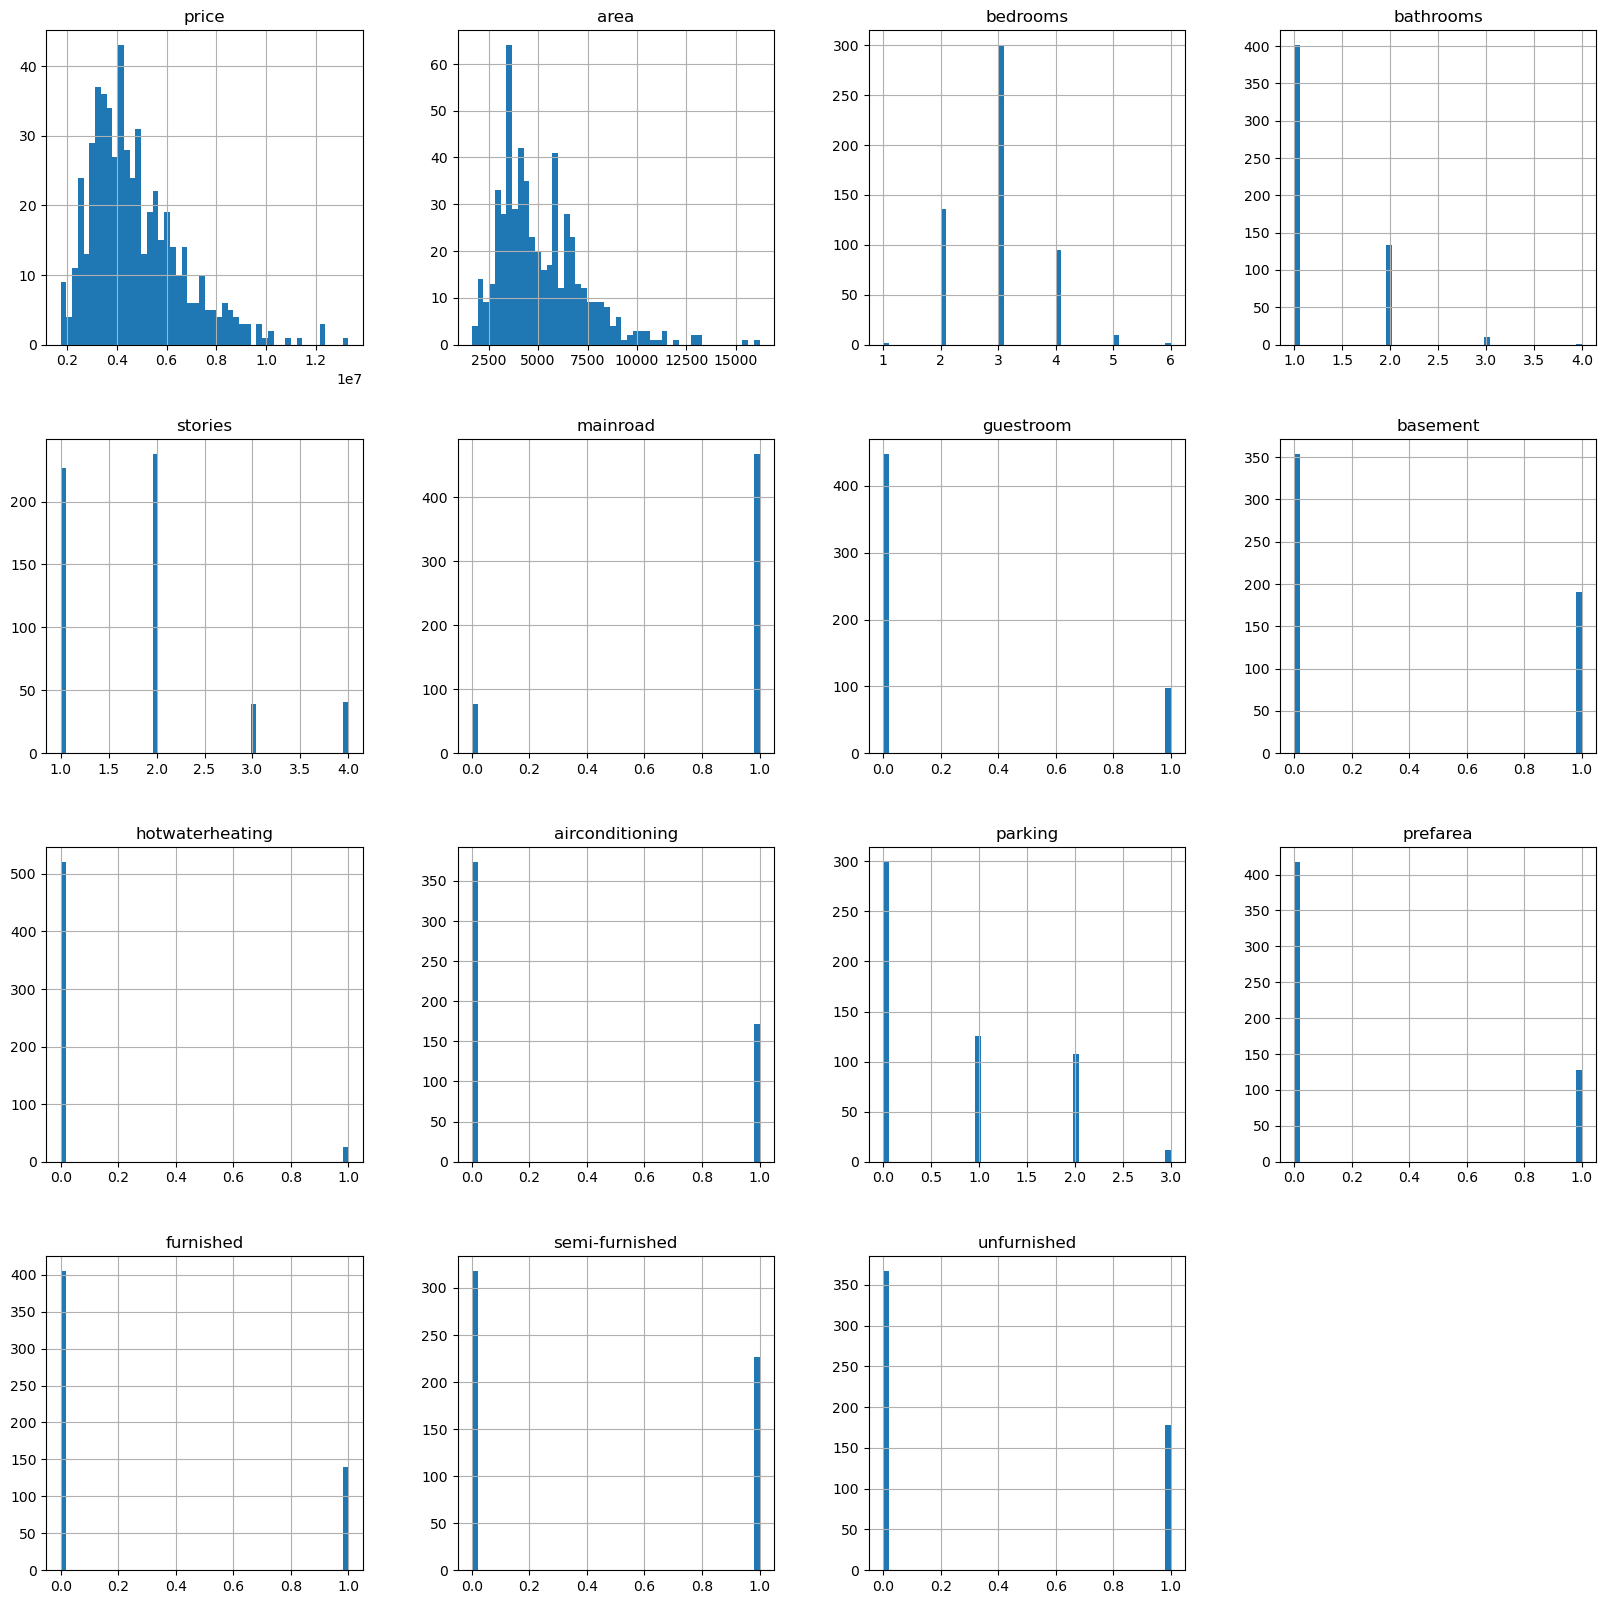

In [13]:
df.hist(bins=50,figsize=(20,20))

In [14]:
skewness = df.skew()

print("Skewness for each feature:\n", skewness)

Skewness for each feature:
 price              1.212239
area               1.321188
bedrooms           0.495684
bathrooms          1.589264
stories            1.082088
mainroad          -2.065410
guestroom          1.688419
basement           0.628590
hotwaterheating    4.353428
airconditioning    0.795748
parking            0.842062
prefarea           1.254361
furnished          1.115969
semi-furnished     0.339635
unfurnished        0.741509
dtype: float64


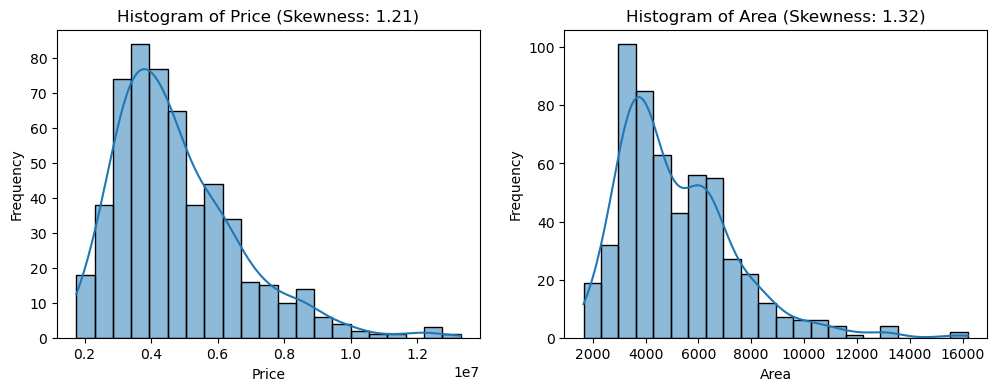

In [15]:
skewness_price = df['price'].skew()
skewness_area = df['area'].skew()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True)
plt.title(f'Histogram of Price (Skewness: {skewness_price:.2f})')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['area'], kde=True)
plt.title(f'Histogram of Area (Skewness: {skewness_area:.2f})')
plt.xlabel('Area')
plt.ylabel('Frequency')

plt.show()

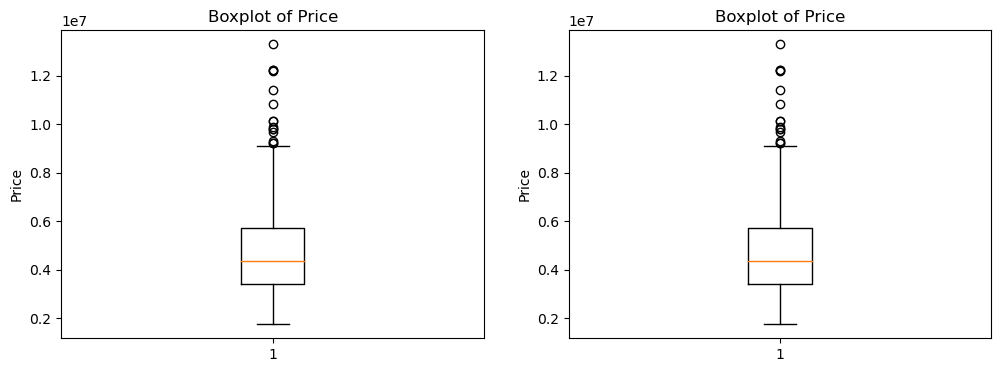

In [16]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.boxplot(df['price'])
plt.title('Boxplot of Price')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
plt.boxplot(df['price'])
plt.title('Boxplot of Price')
plt.ylabel('Price')

plt.show()

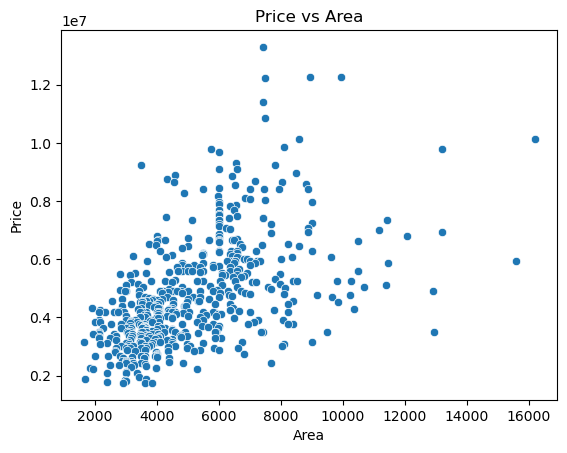

In [17]:
sns.scatterplot(x=df['area'], y=df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area')
plt.show()

In [18]:
df['price'] = np.log(df['price'])
df['area'] = np.log(df['area'])

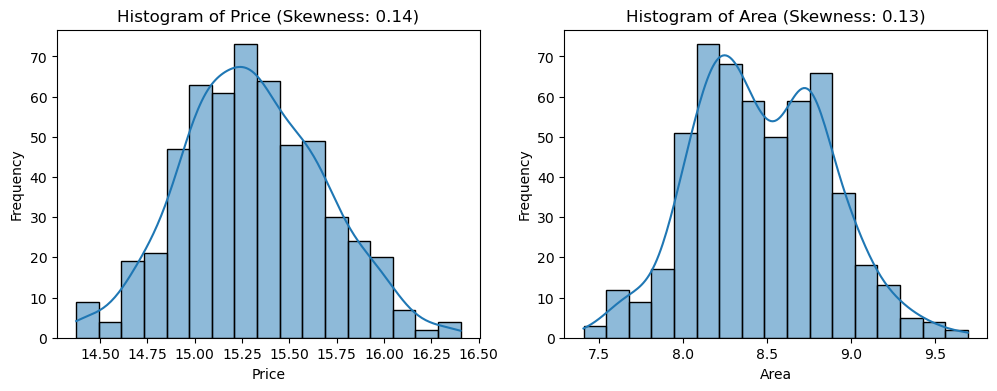

In [19]:
skewness_price = df['price'].skew()
skewness_area = df['area'].skew()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True)
plt.title(f'Histogram of Price (Skewness: {skewness_price:.2f})')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['area'], kde=True)
plt.title(f'Histogram of Area (Skewness: {skewness_area:.2f})')
plt.xlabel('Area')
plt.ylabel('Frequency')

plt.show()

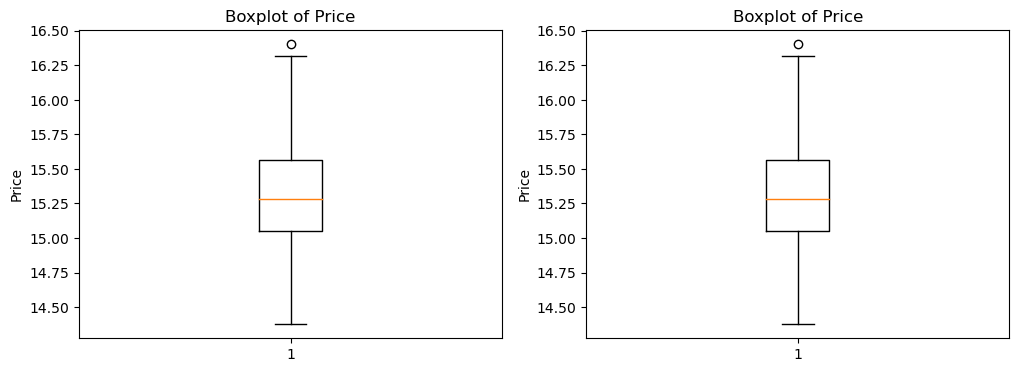

In [20]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.boxplot(df['price'])
plt.title('Boxplot of Price')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
plt.boxplot(df['price'])
plt.title('Boxplot of Price')
plt.ylabel('Price')

plt.show()

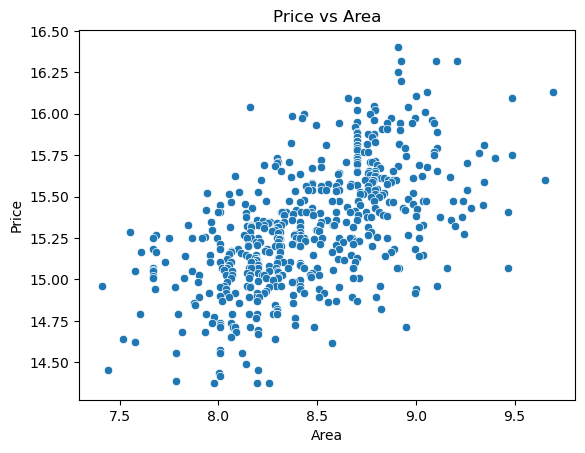

In [21]:
sns.scatterplot(x=df['area'], y=df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area')
plt.show()

In [22]:
from sklearn.utils import shuffle
df = shuffle(df, random_state=100)

In [23]:
X = df.drop('price', axis=1)
y = df['price']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [25]:
from sklearn.preprocessing import MinMaxScaler
num_vars = ['area','bedrooms', 'bathrooms', 'stories', 'parking']
scaler = MinMaxScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_test[num_vars] = scaler.transform(X_test[num_vars])

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R² scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² of Linear Regression (Training Set): {r2_train}")
print(f"R² of Linear Regression (Testing Set): {r2_test}")


R² of Linear Regression (Training Set): 0.7001288469303175
R² of Linear Regression (Testing Set): 0.7333274217505636


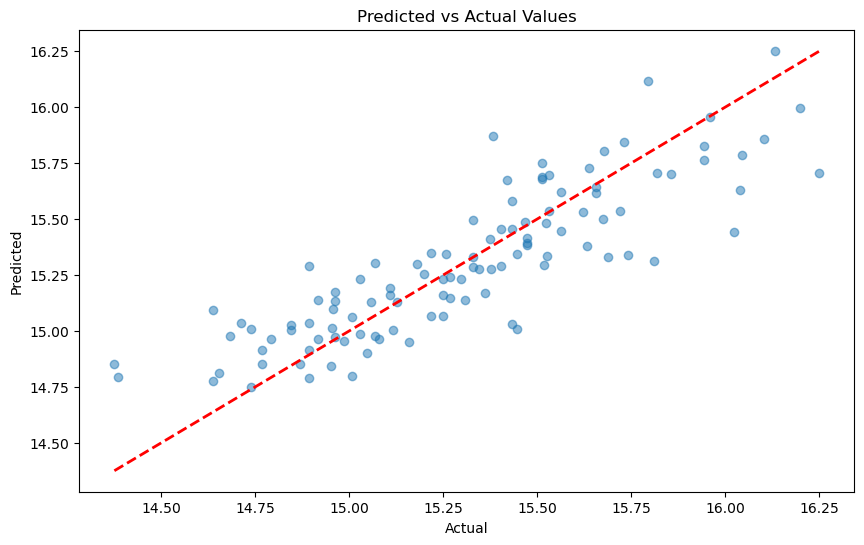

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Values')
plt.show()

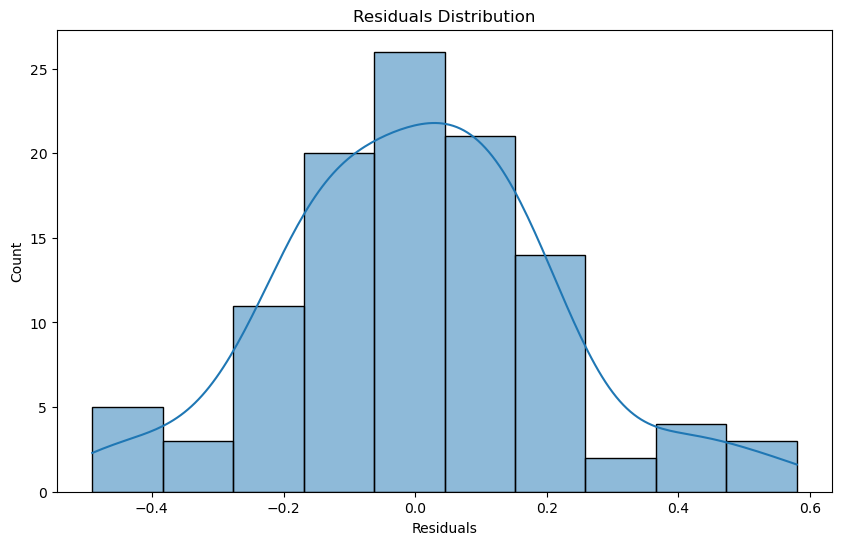

In [28]:
# Residuals Distribution
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()

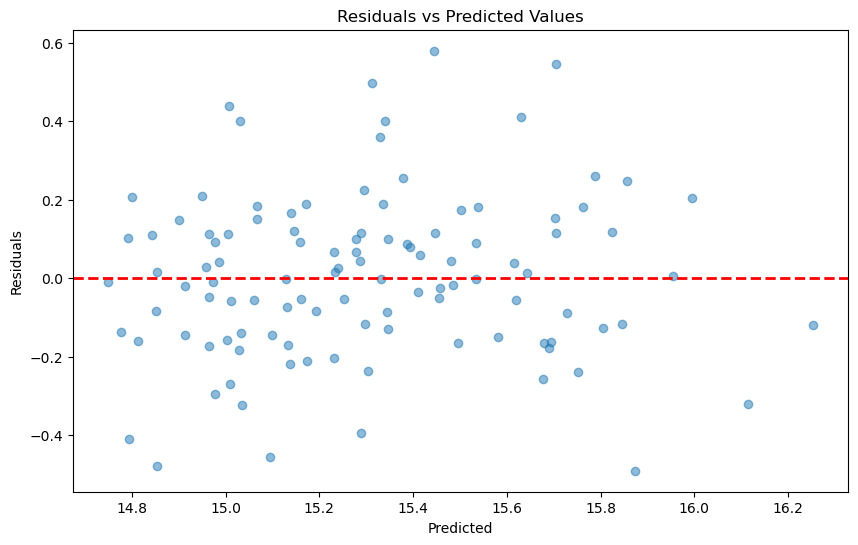

In [29]:
# Residuals vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [30]:
# Function to predict price for new data
def predict_price():
    print("Enter new data values:")
    
    # Collect user inputs
    data = {
        'bedrooms': int(input("Number of bedrooms: ")),
        'bathrooms': float(input("Number of bathrooms: ")),
        'stories': int(input("Number of stories: ")),
        'parking': int(input("Number of parking spaces: ")),
        'mainroad': int(input("Main road (1 for yes, 0 for no): ")),
        'guestroom': int(input("Guestroom (1 for yes, 0 for no): ")),
        'basement': int(input("Basement (1 for yes, 0 for no): ")),
        'hotwaterheating': int(input("Hot water heating (1 for yes, 0 for no): ")),
        'airconditioning': int(input("Air conditioning (1 for yes, 0 for no): ")),
        'prefarea': int(input("Preferred area (1 for yes, 0 for no): ")),
        'furnished': int(input("Furnished (1 for yes, 0 for no): ")),
        'semi-furnished': int(input("Semi-furnished (1 for yes, 0 for no): ")),
        'unfurnished': int(input("Unfurnished (1 for yes, 0 for no): ")),
        'area': np.log(float(input("Area (in square meters): ")))  # Apply log transform to area
    }
    
    # Convert to DataFrame
    new_data = pd.DataFrame([data])
    
    # Ensure new_data has the same columns as the training data
    new_data = new_data.reindex(columns=X.columns, fill_value=0)
    
    # Scale the new data
    new_data[num_vars] = scaler.transform(new_data[num_vars])
    
    # Predict price
    predicted_price = model.predict(new_data)
    
    # Transform back from log scale
    predicted_price = np.exp(predicted_price)
    
    print(f"Predicted price: {predicted_price[0]:.2f}")

# Call the prediction function
predict_price()

Enter new data values:
Number of bedrooms: 3
Number of bathrooms: 2
Number of stories: 4
Number of parking spaces: 5
Main road (1 for yes, 0 for no): 1
Guestroom (1 for yes, 0 for no): 1
Basement (1 for yes, 0 for no): 1
Hot water heating (1 for yes, 0 for no): 1
Air conditioning (1 for yes, 0 for no): 1
Preferred area (1 for yes, 0 for no): 1
Furnished (1 for yes, 0 for no): 1
Semi-furnished (1 for yes, 0 for no): 0
Unfurnished (1 for yes, 0 for no): 0
Area (in square meters): 5474
Predicted price: 12075127.59
